# **A/B Test: Free Trial Length (7-day vs 14-day)**

**Primary question:** Does giving users more time to experience the product increase paid conversion and lifetime value?

**Objective:** Determine whether a 14-day free trial (Variant B) produces higher paid conversion and better LTV than a 7-day free trial (Variant A), without substantially worsening acquisition quality or increasing abuse.

---

# **Success metrics & definitions**

**Primary metrics:**

•	**Paid conversion rate (PCR)** — (# users who convert to paid within X days after trial start) / (# users who started trial)

•	**Customer lifetime value (LTV)** — mean present-value of revenue per user over the chosen observation window (e.g., 180 days).

**Metric windows:**

•	**Paid conversion window**: 30 days and 90 days post-trial start (report both)

•	**LTV observation window**: 90 days

# **Variants**

•	**Control (A)**: 7-day free trial

•	**Treatment (B)**: 14-day free trial

# **Target population & eligibility**

•	**Universe**: New users (first-time accounts) who reach the trial offer.

•	**Inclusion criteria**: Users who are eligible for the free trial (not on trial cooldown, not previously converted)

•	**Exclusion criteri**: Internal QA, employees, test accounts, users from geos with legal restrictions

# **Randomization & allocation**

•	**Unit of randomization**: User account ID

•	**Allocation**: 50/50 split (A:B)

•	**Randomization method**: Deterministic hash of user_id mod 100 -> <50 => A else B. Implement in signup service so allocation is sticky across sessions.

# **Sample size & duration**

•	**Minimum detectable effect (MDE)**: choose meaningful uplift to detect. Example: target 10% relative uplift in paid conversion.

**Duration guidance** At least one full paid-conversion window (30 days) has elapsed for earliest cohort. If N would take >4 weeks, ensure business seasonality is considered.

# **Experiment instrumentation & data collection**

**Event definitions:**

•	**trial_activated** — user clicks CTA and trial begins (record plan_id, trial_length_days)

•	**converted_to_paid** — billing success event, record plan, price, coupon_id

---

# **What’s Included in the Dataset**

**500 users with:**

*   user_id
*   variant (A = 7-day, B = 14-day)
*   trial_activated (0/1)
*   converted_30d (0/1)
*   converted_90d (0/1)
*   ltv_90d
*   sessions_during_trial




# **Import data file**

In [ ]:
import pandas as pd

df = pd.read_csv('ab testing.csv')
print(df.head())

   user_id  variant  trial_activated  converted_30d  converted_90d    ltv_90d  \
0        1   A_7day                1              0              0   0.000000   
1        2  B_14day                1              0              1  59.401703   
2        3   A_7day                0              0              0   0.000000   
3        4   A_7day                1              0              0   0.000000   
4        5   A_7day                1              0              0   0.000000   

   sessions_during_trial  
0                      5  
1                     11  
2                      5  
3                      5  
4                      3  


# **Analysis**

Using an interval (like a 95% confidence interval) instead of a single number is important because any metric you measure from a sample has uncertainty.

| Reason                           | Simple explanation                                               |
| -------------------------------- | ---------------------------------------------------------------- |
| **Sampling variation exists**    | Your result is just one sample; intervals show uncertainty.      |
| **Point estimates hide error**   | A single number is misleading without its margin of error.       |
| **Helps compare A vs B**         | Overlap vs non-overlap shows whether differences are meaningful. |
| **Prevents overconfidence**      | Wide interval → be cautious; narrow interval → more certain.     |
| **Supports statistical testing** | Required for significance, hypothesis tests, and decision rules. |

---

There are four most common interval types for proportions: (1) Normal/Wald CI, (2) Wilson CI, (3) Clopper–Pearson CI, (4) Bayesian credible interval.

🔥 **Direct Comparison Table:**

| Interval Type         | Uses Normal Approx? | Width              | Reliability                      | Best Use Case                   |
| --------------------- | ------------------- | ------------------ | -------------------------------- | ------------------------------- |
| **Wald (normal)**     | Yes                 | Narrow (but wrong) | ❌ Poor                           | Quick rough estimates           |
| **Wilson**            | No                  | Accurate           | ✅ Excellent                      | A/B tests, proportions near 0/1 |
| **Clopper–Pearson**   | No                  | Wide               | ✅ Very reliable but conservative | Regulated environments          |
| **Bayesian Credible** | No                  | Adaptive           | ⭐ Excellent + intuitive          | Probability-based reasoning     |

🎯 **Simple Metaphor:**

Imagine you're guessing someone’s height by watching them walk by.

**Wald:** You assume everyone’s height distribution is perfectly normal, so you just draw a symmetric band around your guess. Works well for average-sized people but fails for edge cases.

**Wilson:** You adjust your prediction based on the fact that heights can’t be negative or 10 feet, giving a more realistic range.

**Clopper–Pearson:** You make a very safe, cautious guess, producing a range that is always big enough to be correct—but often too big.

**Bayesian:** You combine:

what you just saw

what you believed before (e.g., “most adults are 5–6 ft”) to get the most natural range.

🔥 **Final Summary**

**Wald:** Fast but inaccurate near edges.

**Wilson:** Most accurate for A/B tests; usually the best choice.

**Clopper–Pearson:** Extremely cautious; exact but too wide.

**Bayesian:** Most intuitive; tells you the probability the true rate lies in the interval.

---

Calculations:

**Raw counts:**

• **Variant A (7-day):** total users = 244, activated = 165.

• **Variant B (14-day):** total users = 256, activated = 188.

---

**Activation rate (proportion) for each variant:**

**Variant A**

• activation_rate_A = activated_A / total_A = 165 / 244 = 0.6762

**So Activation Rate (A) ≈ 67.62%.**

---

**Variant B**

• activation_rate_B = activated_B / total_B = 188 / 256 = 0.734375

**So Activation Rate (B) ≈ 73.44%.**

---

**Absolute and relative differences:**

• Absolute difference (B − A) = 0.734375 − 0.6762 ≈ 5.81 percentage points

• Relative uplift = (absolute difference) / activation_rate_A = 0.0581 / 0.6762 ≈ 8.60% relative increase.

**So Variant B has ~+5.8 pp absolute and ~+8.6% relative activation improvement over A in this synthetic sample.**

---

# **Wald (normal)**

• Compare PCR between Variant B and Variant A using two-sided z-test for proportions (or Chi-square). Report absolute difference, relative percent change, 95% CI, and p-value.

**Uncertainty on each activation rate (95% confidence intervals)**

• Sample proportions follow a Normal distribution (approximately) when sample size is large.

• Standard error for a proportion p with n observations: SE = sqrt( p(1−p) / n )

• A 95% confidence interval corresponds to capturing the central 95% of a Normal distribution.

• In a standard Normal distribution, the values that cut off the middle 95% lie at ±1.96 standard deviations from the mean.

---

**Variant A standard error:**

• p = 0.6762, n = 244

• SE_A = sqrt(0.6762295 × (1 − 0.6762) / 244) = 0.0299551

**95% CI = p ± 1.96 × SE**

• Lower = 0.6762 − 1.96×0.0299551 = 0.6175

• Upper = 0.6762 + 1.96×0.0299551 = 0.7349

**So Activation Rate A 95% CI ≈ [61.75%, 73.49%].**

---

**Variant B standard error:**

• p = 0.734375, n = 256

• SE_B = sqrt(0.734375 × (1 − 0.734375) / 256) = 0.0276

**95% CI = p ± 1.96 × SE**

• Lower = 0.734375 − 1.96×0.0276 = 0.6803

• Upper = 0.734375 + 1.96×0.0276 = 0.7885

**So Activation Rate B 95% CI ≈ [68.03%, 78.85%].**

---

# **Simple statistical test: two-proportion z-test (are activation rates significantly different?)**

We test **H₀: p_A = p_B vs H₁: p_A ≠ p_B** using the pooled standard error.

Steps:

Pooled proportion: p_pool = (activated_A + activated_B) / (n_A + n_B) = (165 + 188) / (244 + 256) = 353 / 500 = 0.706

Standard error (pooled): SE_pool = sqrt( p_pool × (1 − p_pool) × (1/n_A + 1/n_B) ) = sqrt(0.706 × 0.294 × (1/244 + 1/256)) ≈ 0.040781

z statistic: z = (p_B − p_A) / SE_pool = 0.0581454918 / 0.040781 ≈ 1.42649

two-sided p-value: p = 2 × (1 − Φ(|z|)) → using standard normal CDF p ≈ 0.1537

**Interpretation:** p ≈ 0.154 > 0.05, so we do not reject the null at the 5% level. In this synthetic sample, the observed activation uplift (≈5.8 pp) is **not statistically significant at α = 0.05.**

---

# **Decision criteria**

• **Declare Variant B winner if:** paid conversion is statistically significantly higher and LTV is equal or higher (or show business-significant improvement even if p>0.05 but CI excludes negative practical differences).

• **Declare Variant A (control) winner if:** paid conversion is significantly higher for A, or Variant B increases abuse/refund rates materially.

• **Tie / Inconclusive:** If paid conversion delta is not significant and LTV differences are small/uncertain, maintain current (7-day) and consider qualitative research.

# **Risks & mitigations**

• **Selection of low-quality users** — track downstream retention and refund rates; consider trial gating if abuse spikes.

• **Seasonality & external campaigns** — ensure randomization is balanced across acquisition channels and campaign periods.

• **Delayed cash flow** — track conversion timing to understand revenue lag.

# **Notes and Insights**

• with more users (larger n) the same absolute uplift could reach statistical significance.

• If B wins, roll out 14-day trial to 100% with monitoring for 30 days of conversion and refund signals.

• using Normal/Wald CI, result is inconclusive, so keep 7-day but run qualitative user interviews and consider testing targeted longer trials for specific segments.

# **✅ Final Comparison Table (All 4 Interval Types)**

detail calculations not shown

| Group         | Wald CI        | Wilson CI      | Clopper–Pearson CI | Bayesian CI    |
| ------------- | -------------- | -------------- | ------------------ | -------------- |
| **A (0.676)** | (0.617, 0.735) | (0.615, 0.731) | (0.614, 0.736)     | (0.618, 0.733) |
| **B (0.734)** | (0.679, 0.789) | (0.680, 0.787) | (0.679, 0.788)     | (0.682, 0.786) |

# **Visualization of all four confidence interval types**

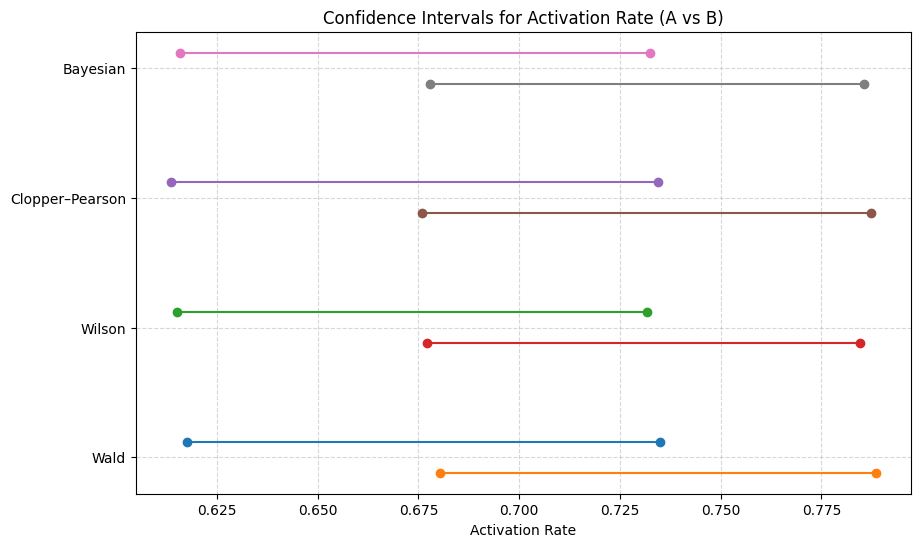

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportion_confint

# ----------------------------
# Input Data
# ----------------------------
xA, nA = 165, 244   # Variant A
xB, nB = 188, 256   # Variant B

# List of CI methods
methods = ["normal", "wilson", "beta", "jeffreys"]
labels  = ["Wald", "Wilson", "Clopper–Pearson", "Bayesian"]

# Compute intervals
intervals_A = [proportion_confint(xA, nA, method=m) for m in methods]
intervals_B = [proportion_confint(xB, nB, method=m) for m in methods]

# ----------------------------
# Visualization
# ----------------------------
plt.figure(figsize=(10, 6))

# Slight vertical offset so A and B don't overlap exactly
yA = np.arange(len(labels)) + 0.12
yB = np.arange(len(labels)) - 0.12

for i, label in enumerate(labels):
    lowA, highA = intervals_A[i]
    lowB, highB = intervals_B[i]

    # Plot Variant A
    plt.plot([lowA, highA], [yA[i], yA[i]], marker='o', label="_nolegend_")

    # Plot Variant B
    plt.plot([lowB, highB], [yB[i], yB[i]], marker='o', label="_nolegend_")

plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Activation Rate")
plt.title("Confidence Intervals for Activation Rate (A vs B)")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


🔍 **Interpretation**

**Do intervals overlap?**

YES — **all four interval types for A and B overlap**.

**Does that mean not statistically significant?**

Generally yes, overlapping 95% CIs imply the difference **may not be significant** (though the true test is the z-test on the difference).